In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

TRAINING_DATASET_SOURCE = '../datasets/training_data.csv'
TEST_DATASET_SOURCE = '../datasets/test_data.csv'

train_df = pd.read_csv(TRAINING_DATASET_SOURCE)
test_df = pd.read_csv(TEST_DATASET_SOURCE)

In [2]:
train_df.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

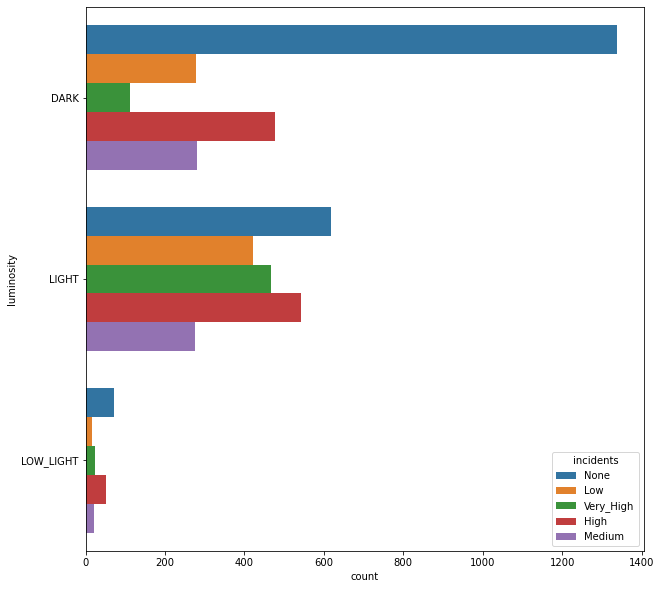

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(y='luminosity', data=train_df, hue='incidents')

plt.show()

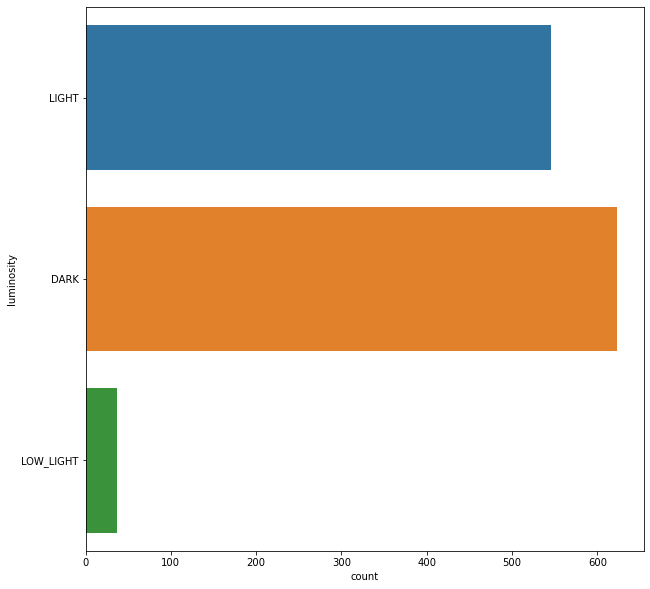

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(y='luminosity', data=test_df)

plt.show()

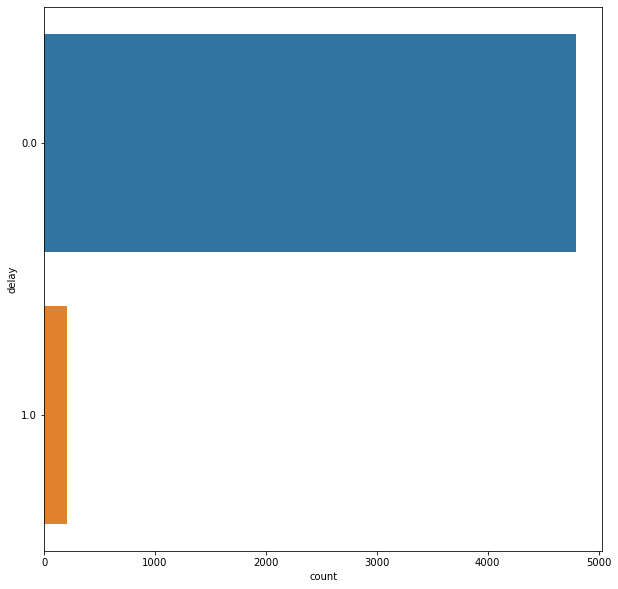

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = train_df.copy()

est = KBinsDiscretizer(n_bins=2, strategy='kmeans', encode='ordinal')
train_df_copy['delay'] = \
    est.fit_transform(train_df_copy[['delay_in_seconds']])

#sns.countplot(y='delay', data=train_df_copy, hue='incidents')
sns.countplot(y='delay', data=train_df_copy)

plt.show()

In [6]:
def convert_record_date(df: pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()

    record_date = pd.DatetimeIndex(df_['record_date'])

    df_.drop('record_date', axis=1, inplace=True)

    df_['hour'] = record_date.hour
    df_['day'] = record_date.day
    df_['month'] = record_date.month
    df_['weekday'] = record_date.weekday
    df_['hour'] = record_date.hour

    return df_

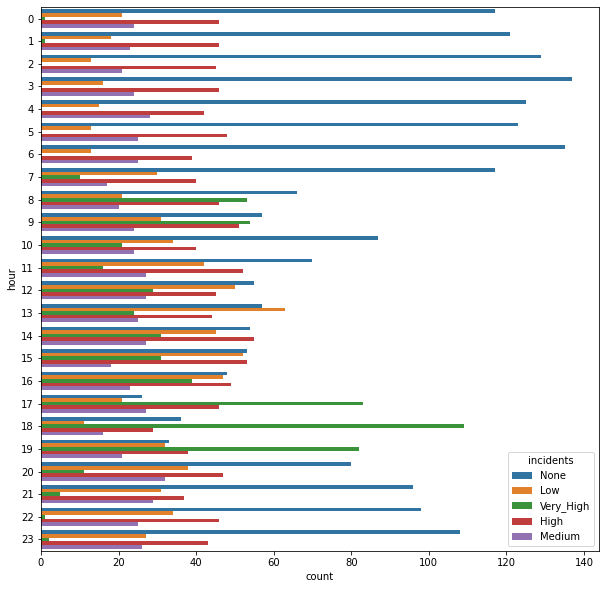

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = convert_record_date(train_df.copy())

#est = KBinsDiscretizer(n_bins=3, strategy='quantile', encode='ordinal')
#train_df_copy['hour'] = est.fit_transform(train_df_copy[['hour']])

sns.countplot(y='hour', data=train_df_copy, hue='incidents')

plt.show()

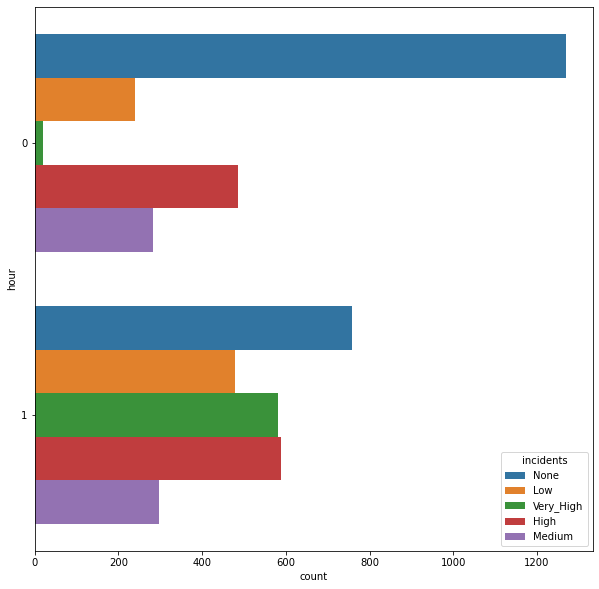

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = convert_record_date(train_df.copy())


def hour_of_the_day(hour):
    if hour >= 20 or 0 <= hour <= 6:
        return 0
    elif 7 <= hour <= 19:
        return 1

    return 2


train_df_copy["hour"] = train_df_copy["hour"].apply(hour_of_the_day)

sns.countplot(y='hour', data=train_df_copy, hue='incidents')

plt.show()

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain'],
      dtype='object')


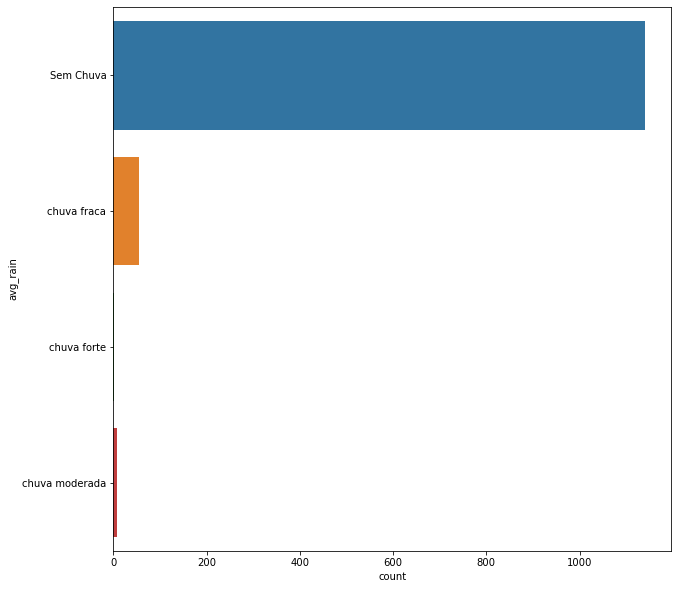

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

train_df_copy = test_df.copy()

print(train_df_copy.columns)

sns.countplot(y='avg_rain', data=train_df_copy)

plt.show()